<a href="https://colab.research.google.com/github/Luslecg/DataScienceClass/blob/main/SWA_final_assignment_(Bank_Marketing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Luslecg/Luslecg.github.io/main/bank.csv", delimiter=';')

# Display the first few rows of the DataFrame to verify it was loaded correctly
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [ ]:
print(df.head())
print(df.columns)
rows, columns = df.shape

# Display the total number of rows and columns
print(f"Total rows: {rows}, Total columns: {columns}")

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Download NLTK data
nltk.download("punkt")
nltk.download("stopwords")

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Example: Tokenize and remove stop words
stop_words = set(stopwords.words("english"))
text = df["job"].iloc[0]
word_tokens = word_tokenize(text)
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

print(filtered_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['unemployed']


In [ ]:
!pip install matplotlib seaborn wordcloud


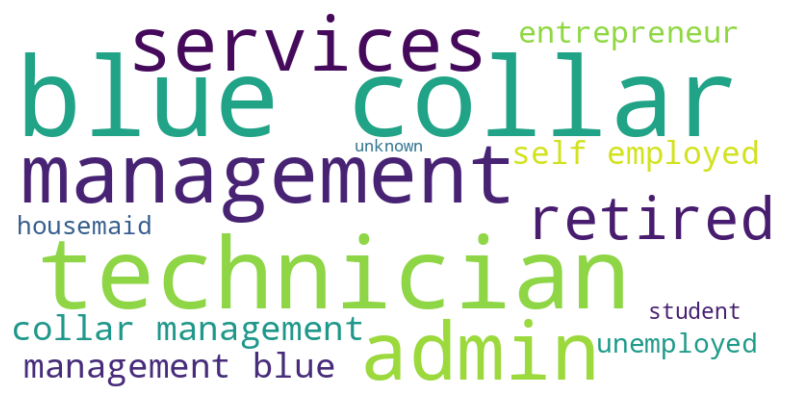

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example: Generate a word cloud
all_text = ' '.join(df['job'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

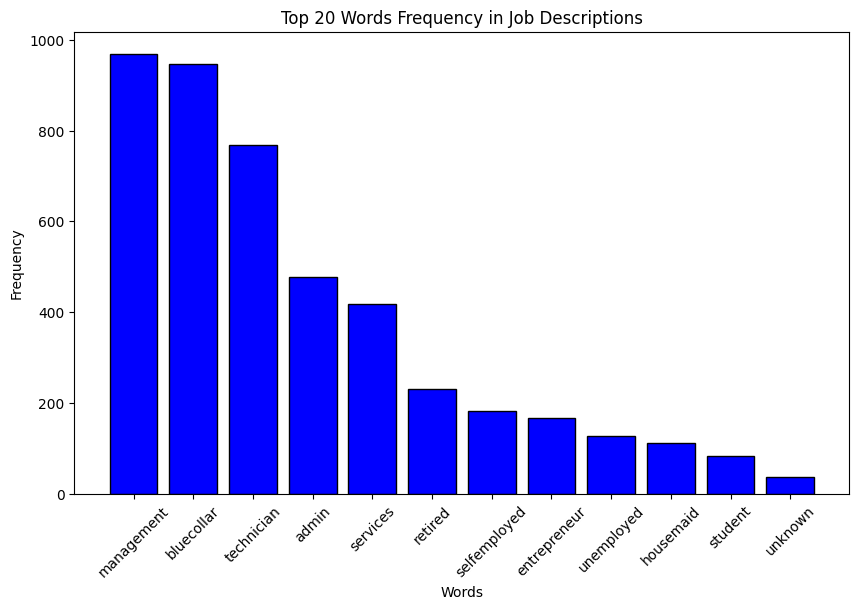

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import STOPWORDS

# Step 2: Preprocess Text Data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Process the 'job' column
df['processed_job'] = df['job'].apply(preprocess_text)

# Step 3: Extract Word Frequencies
all_words = ' '.join(df['processed_job']).split()
stopwords = set(STOPWORDS)
filtered_words = [word for word in all_words if word not in stopwords]
word_counts = Counter(filtered_words)

# Get the top 20 most common words
top_words = word_counts.most_common(20)

# Separate the words and their frequencies for plotting
words, counts = zip(*top_words)

# Step 4: Plot Histogram of Top Words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue', edgecolor='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Frequency in Job Descriptions')
plt.xticks(rotation=45)
plt.show()


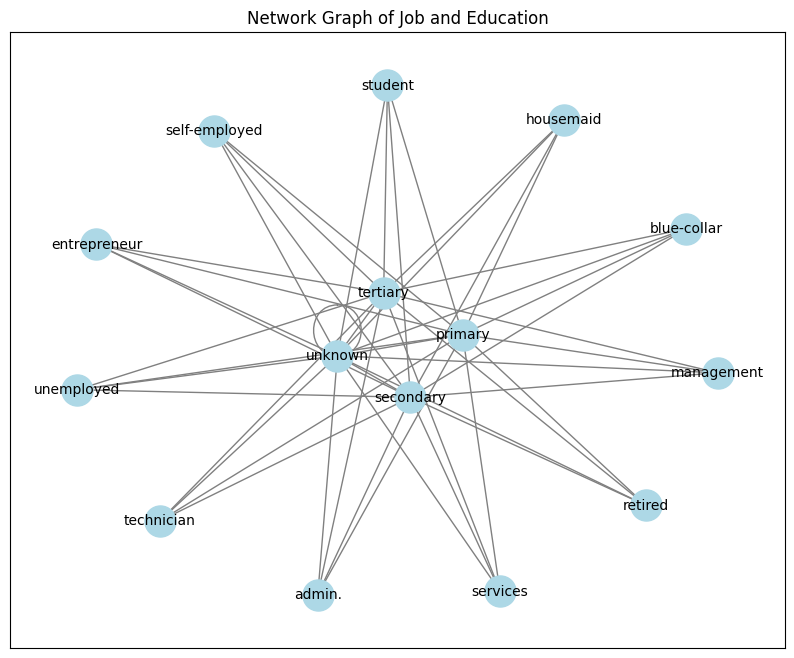

In [ ]:
import networkx as nx
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt


edges = list(zip(df['job'], df['education']))

# Create graph
G = nx.Graph()
G.add_edges_from(edges)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.title('Network Graph of Job and Education')
plt.show()

